# Environment

In [5]:
import pandas as pd
import yaml
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load config
# CONFIG_PATH = "/home/michal/Github/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment/config.yaml"
WORKING_DIR = "D:/Github/SRF_MeCP2_cut_tag/iterative_alternative/code7_cpg_enrichment"
CONFIG_PATH = f"{WORKING_DIR}/config.yaml"
# Specify which configuration to use (1-based index)
# Change this to select different configurations
CONFIG_NUMBER = 7

with open(CONFIG_PATH, 'r') as f:
    # Load all documents from the YAML file
    configs = list(yaml.safe_load_all(f))

# Select the specific configuration (subtract 1 because list is 0-based)
config = configs[CONFIG_NUMBER - 1]

# Get values from the selected config
BASE_DIR = config['base_dir']
RUN_NAME = config['run_name']
CELL_TYPE = config['cell_type']
ALIGNMENT_TYPE = config['alignment_type']
PEAKS_TYPE = config['peaks_type']

ENRICHMENT_FILE = f"{BASE_DIR}/results/{ALIGNMENT_TYPE}/cpg_enrichment/{CELL_TYPE}/{PEAKS_TYPE}/{RUN_NAME}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

OUTPUT_LISTS_PATH = f"{BASE_DIR}/results/{ALIGNMENT_TYPE}/cpg_enrichment/{CELL_TYPE}/{PEAKS_TYPE}/{RUN_NAME}/lists"
print(OUTPUT_LISTS_PATH)
os.makedirs(OUTPUT_LISTS_PATH, exist_ok=True)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

sys.path.append(f"{WORKING_DIR}")
try:
    import functions
    importlib.reload(functions)
    from functions import *
except ModuleNotFoundError:
    print("Warning: Could not import functions module. Make sure functions.py exists in the code7_cpg_enrichment directory.")


D:/Github/SRF_MeCP2_cut_tag/iterative_alternative/results/no_dedup/cpg_enrichment/Neu/broad/cpg_enrichment_1_rep_in_peaks/cpg_enrichment_parallel.csv
D:/Github/SRF_MeCP2_cut_tag/iterative_alternative/results/no_dedup/cpg_enrichment/Neu/broad/cpg_enrichment_1_rep_in_peaks/lists


# Load Data

In [6]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [7]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (15155, 24)

First few rows:


,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
0,chr1,3670619,3671074,48.553010,36.378130,1.334676,1.0,both,both,False,3,2,"40.693594765158494,46.949046249665365,58.01638882370665","4.222461801862742,68.53379841865063",1937,455,CpG:,613,3,1,6.08946;8.05807;5.49517,12.1862,3670618,3672555
1,chr1,3671654,3672156,48.553010,36.378130,1.334676,1.0,both,both,False,3,2,"40.693594765158494,46.949046249665365,58.01638882370665","4.222461801862742,68.53379841865063",1937,502,CpG:,613,3,2,6.08946;8.05807;5.49517,14.2013;12.1862,3670618,3672555
2,chr1,4496947,4497608,5.909448,14.458656,0.408714,1.0,both,both,False,2,2,"2.8028995811568316,14.925445258075282,0.0","2.303671158004914,26.61364028486925",2089,661,CpG:,619,1,1,3.0083,4.61906,4496514,4498603
3,chr1,4571641,4572075,20.994651,18.831086,1.114893,1.0,both,both,False,3,2,"26.031328827189064,14.683576227902995,22.26904846832133","2.590484450059953,35.07168820338153",643,434,CpG:,619,3,1,3.91321;3.39512;3.76449,4.05345,4571501,4572144
4,chr1,4689184,4689397,12.116976,11.276507,1.074533,1.0,both,endo_only,False,3,2,"14.38139092214815,17.180720451899937,4.788817548227835","5.597554313743507,16.955460064227765",910,213,CpG:,620,0,1,NaN,3.96057,4688527,4689437



Column names:
['chr', 'start', 'end', 'exo_signal', 'endo_signal', 'enrichment', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'exo_replicates_with_signal', 'endo_replicates_with_signal', 'exo_replicate_signals', 'endo_replicate_signals', 'region_length', 'cpg_length', 'cpg_score', 'cpg_name', 'exo_replicates_with_peaks', 'endo_replicates_with_peaks', 'exo_peak_scores_by_rep', 'endo_peak_scores_by_rep', 'region_start', 'region_end']


**Columns explanation:**

1. Signal vs Peaks columns:

- `endo_replicates_with_signal`: Counts how many replicates have a non-zero signal value when measuring the bigWig signal in the region.
- `endo_replicates_with_peaks`: Counts how many replicates have an overlapping peak in the broadPeak files.

So, e.g. it's possible to have `endo_replicates_with_peaks=0` but `endo_replicates_with_signal=2` because:
- Peaks represent regions that passed the peak caller's statistical threshold for significance
- Signal values represent the raw enrichment data before any statistical filtering
- So you can have detectable signal in a region that wasn't strong/consistent enough to be called as a peak

2. Scores vs Signals:

- `endo_peak_scores_by_rep`: Contains the `signalValue` scores from the broadPeak files for each replicate that has a peak overlapping the region. These scores are peak caller-specific enrichment metrics.
- `endo_replicate_signals`: Contains the actual signal values extracted from the bigWig files for each replicate in that region. These are the raw signal values.

`endo_peak_scores_by_rep` is NaN when there are no peaks overlapping the region in any replicate (`endo_replicates_with_peaks=0`). 

**Handling multiple replicates:**

1. For Signals (from bigWig files):
- Each replicate's signal is obtained independently using `get_signal_from_bigwig()`
- The signals are stored as individual values in `endo_replicate_signals` as a comma-separated string
- The final `endo_signal` used for enrichment calculations is the **mean across all replicates**

2. For Peak Scores:
- Peak scores are stored in `endo_peak_scores_by_rep` using a specific format:
  - Scores from different peaks within the same replicate are **comma-separated**
  - Different replicates are **semicolon-separated**
  - If a replicate has no peaks, it's simply not included in the string
- **There's no averaging of peak scores**

For example:
- If replicate 1 has two peaks with scores 5.0 and 6.0, and replicate 2 has one peak with score 4.0, while replicate 3 has no peaks:
  - `endo_peak_scores_by_rep` would be: `"5.0, 6.0; 4.0"`
  - `endo_replicates_with_peaks` would be `2`
  - If all replicates had signals of `2.0`, `3.0`, and `1.0`:
    - `endo_replicate_signals` would be `"2.0, 3.0, 1.0"`
    - `endo_signal` would be `2.0` (the mean)
    - `endo_replicates_with_signal` would be `3`

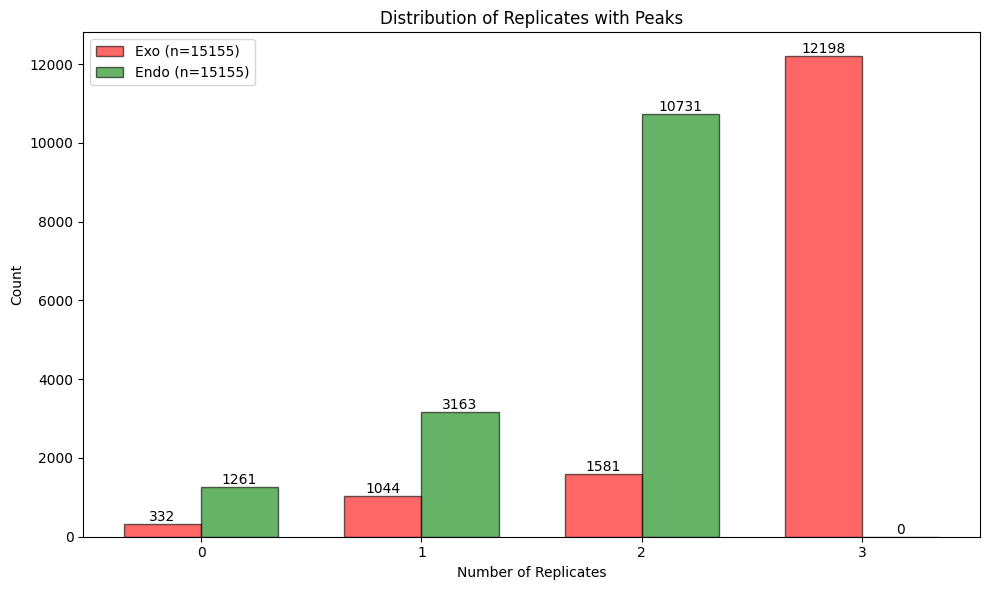

In [8]:
# Create single plot
plt.figure(figsize=(10, 6))

# Get data for plotting
x = np.arange(4)  # 0 through 3 replicates
exo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['exo_replicates_with_peaks'] == i]) for i in range(4)]
endo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['endo_replicates_with_peaks'] == i]) for i in range(4)]

# Plot bars side by side
width = 0.35
plt.bar(x - width/2, exo_counts, width, label=f'Exo (n={sum(exo_counts)})', color='red', alpha=0.6, edgecolor='black')
plt.bar(x + width/2, endo_counts, width, label=f'Endo (n={sum(endo_counts)})', color='green', alpha=0.6, edgecolor='black')

# Add value labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, exo_counts[i], str(exo_counts[i]), 
             ha='center', va='bottom')
    plt.text(x[i] + width/2, endo_counts[i], str(endo_counts[i]),
             ha='center', va='bottom')

plt.title('Distribution of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [10]:
# Split data based on binding type
exo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'exo_only']
endo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'endo_only'] 
both_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_signal)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_signal)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_signal)}")


Number of CpG islands bound by exo only: 224
Number of CpG islands bound by endo only: 8
Number of CpG islands bound by both: 14923


## By peaks number

Minimum 2 replicates with peaks

In [11]:
# Split data based on binding type
exo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'exo_only']
endo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'endo_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by exo only: 1261
Number of CpG islands bound by endo only: 332
Number of CpG islands bound by both: 13562


# Data analysis

## Both: enrichment distribution

In [12]:
print("Summary statistics of enrichment values selected by signal:")
print(both_df_by_signal['enrichment'].describe())

print("\nSummary statistics of enrichment values selected by peaks:")
print(both_df_by_peaks['enrichment'].describe())

Summary statistics of enrichment values selected by signal:
count    14923.000000
mean         2.070516
std         23.199404
min          0.000439
25%          0.837083
50%          1.107385
75%          1.477263
max       2498.617974
Name: enrichment, dtype: float64

Summary statistics of enrichment values selected by peaks:
count    1.356200e+04
mean              inf
std               NaN
min      7.178815e-02
25%      8.388322e-01
50%      1.089271e+00
75%      1.430012e+00
max               inf
Name: enrichment, dtype: float64


d:\Programs\miniforge3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


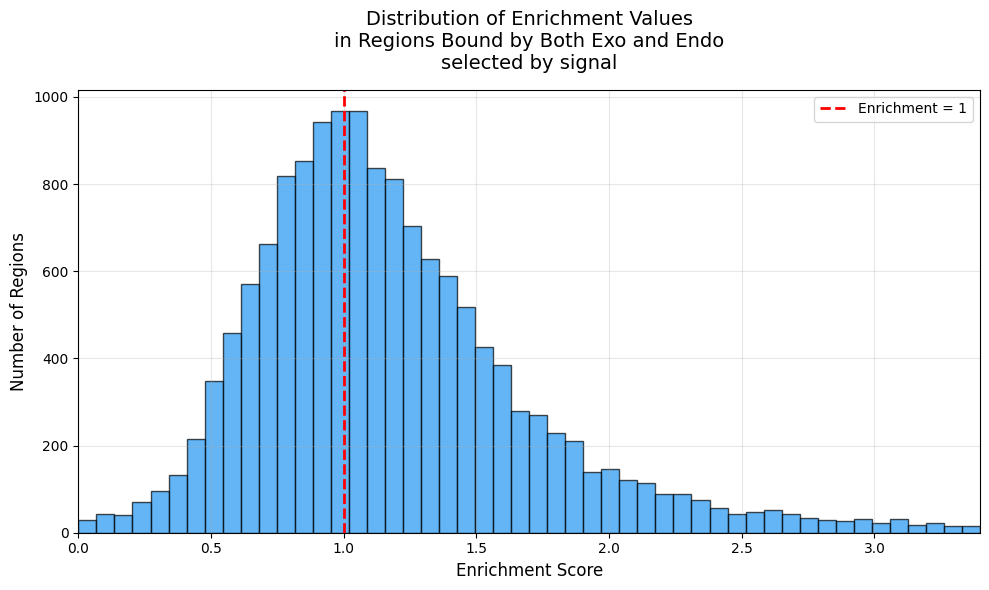

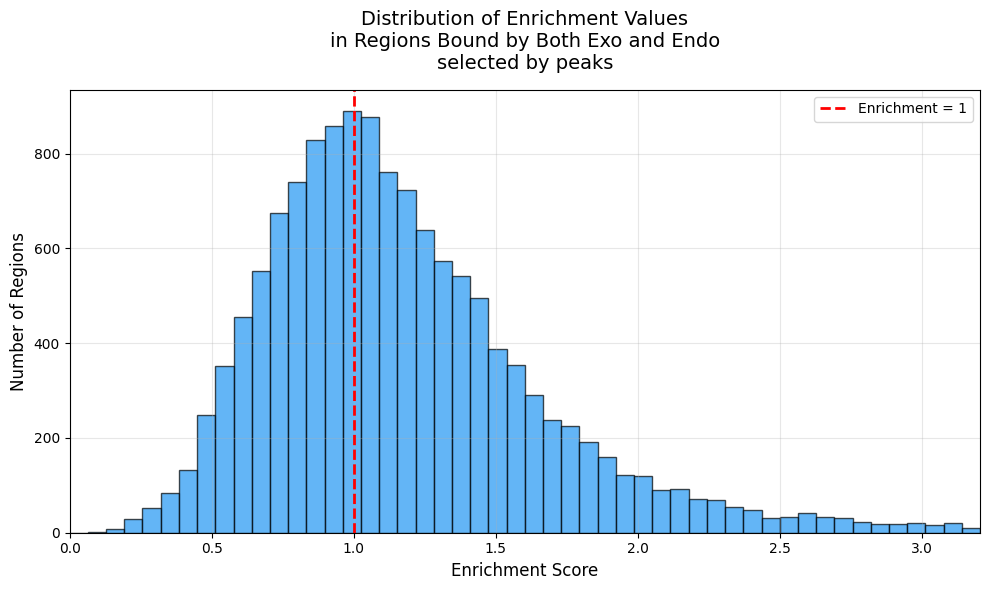

In [13]:
range_min_signal, range_max_signal = plot_enrichment_distribution(both_df_by_signal, title="selected by signal")
range_min_peaks, range_max_peaks = plot_enrichment_distribution(both_df_by_peaks, title="selected by peaks")


In [16]:
both_df_by_signal.to_csv("both_df_by_signal.csv", index=False)
exo_only_df_by_signal.to_csv("exo_only_df_by_signal.csv", index=False)
endo_only_df_by_signal.to_csv("endo_only_df_by_signal.csv", index=False)

## Both: enrichment outliers

In [11]:
outliers_df_signal = both_df_by_signal[both_df_by_signal['enrichment'] > range_max_signal].copy()
print(f"\nNumber of outliers selected by signal(enrichment > {range_max_signal}):", len(outliers_df_signal))

outliers_df_peaks = both_df_by_peaks[both_df_by_peaks['enrichment'] > range_max_peaks].copy()
print(f"\nNumber of outliers selected by peaks(enrichment > {range_max_peaks}):", len(outliers_df_peaks))


Number of outliers selected by signal(enrichment > 3.3978048615018723): 552

Number of outliers selected by peaks(enrichment > 3.203551527579849): 237


In [12]:
outliers_df_signal.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
11988,chr7,16474573,16474839,26.730097,0.010698,2498.617974,0.666667,both,exo_only,False,2,1,"53.27100615728469,0.0,26.919286092122395","0.0,0.02139590581258138",210,266,CpG:,710,1,0,3.67182,NaN,16474638,16474848
13255,chr8,47646765,47647150,72.427785,0.119590,605.636403,0.666667,both,exo_only,False,2,1,"0.0,15.034321911887977,202.24903254635888","0.0,0.23917909992058467",263,385,CpG:,948,1,0,10.3918,NaN,47646591,47646854
7596,chr2,36210836,36211072,50.004707,0.106029,471.612922,0.500000,both,exo_only,False,3,1,"40.091835391051504,30.31991968361422,79.60236553084115","0.0,0.2120582558326361",1801,236,CpG:,861,1,0,7.24615,NaN,36209349,36211150
9912,chr4,136081948,136082171,19.311081,0.056447,342.111587,0.500000,both,exo_only,False,3,1,"39.551816346058295,15.10366302758605,3.2777638651018766","0.0,0.11289346397821627",1990,223,CpG:,1623,2,0,3.0981;4.63046,NaN,136080150,136082140
13340,chr8,70493113,70494351,22.993806,0.068743,334.490845,0.500000,both,exo_only,False,3,1,"34.00267359241843,18.855209127896362,16.123533952567314","0.0,0.13748541039725146",2304,1238,CpG:,1122,2,0,4.11961;4.21821,NaN,70493819,70496123


In [13]:
print_outlier_groups(outliers_df_signal, "signal")


First 5 outliers selected by signal:
chr7:16,474,573-16,474,839                        enrichment: 2498.6179739818253
chr8:47,646,765-47,647,150                        enrichment: 605.6364025407239
chr2:36,210,836-36,211,072                        enrichment: 471.6129223279832
chr4:136,081,948-136,082,171                      enrichment: 342.11158731577774
chr8:70,493,113-70,494,351                        enrichment: 334.49084511860394

Middle 5 outliers selected by signal:
chr17:23,726,212-23,726,871                       enrichment: 5.8455763657184425
chr17:17,345,998-17,346,213                       enrichment: 5.76359841092967
chr15:94,523,226-94,523,538                       enrichment: 5.757281243776929
chr7:51,511,100-51,511,412                        enrichment: 5.755163681985299
chr15:103,014,200-103,015,327                     enrichment: 5.755093547423664

Last 5 outliers selected by signal:
chr7:24,481,424-24,482,473                        enrichment: 3.4133643961100333
ch

In [14]:
n_rows = len(outliers_df_signal)

print("\nFirst 5 outliers selected by signal:")
for _, row in outliers_df_signal[:5].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

if n_rows > 10:
    mid_start = n_rows//2 - 2
    print("\nMiddle 5 outliers selected by signal:")
    for _, row in outliers_df_signal[mid_start:mid_start+5].iterrows():
        print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 5 outliers selected by signal:")
for _, row in outliers_df_signal[-5:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 5 outliers selected by signal:
chr7:16,474,573-16,474,839                        enrichment: 2498.6179739818253
chr8:47,646,765-47,647,150                        enrichment: 605.6364025407239
chr2:36,210,836-36,211,072                        enrichment: 471.6129223279832
chr4:136,081,948-136,082,171                      enrichment: 342.11158731577774
chr8:70,493,113-70,494,351                        enrichment: 334.49084511860394

Middle 5 outliers selected by signal:
chr17:23,726,212-23,726,871                       enrichment: 5.8455763657184425
chr17:17,345,998-17,346,213                       enrichment: 5.76359841092967
chr15:94,523,226-94,523,538                       enrichment: 5.757281243776929
chr7:51,511,100-51,511,412                        enrichment: 5.755163681985299
chr15:103,014,200-103,015,327                     enrichment: 5.755093547423664

Last 5 outliers selected by signal:
chr7:24,481,424-24,482,473                        enrichment: 3.4133643961100333
ch

In [15]:
print_outlier_groups(outliers_df_peaks, "peaks")


First 5 outliers selected by peaks:
chr17:25,133,340-25,133,660                       enrichment: inf
chr8:95,320,500-95,320,757                        enrichment: 290.10006076455073
chr2:164,414,360-164,414,612                      enrichment: 88.74594711630992
chrX:134,474,995-134,476,624                      enrichment: 66.45890489333391
chr16:94,086,715-94,087,055                       enrichment: 19.56157046941247

Middle 5 outliers selected by peaks:
chr6:82,939,460-82,939,736                        enrichment: 4.19747444098134
chr9:111,689,987-111,690,485                      enrichment: 4.17207177314485
chr2:163,472,210-163,472,708                      enrichment: 4.170204300336368
chr12:107,915,284-107,917,294                     enrichment: 4.155270455733433
chr7:127,021,216-127,021,431                      enrichment: 4.13907231554338

Last 5 outliers selected by peaks:
chr18:38,197,778-38,198,120                       enrichment: 3.223597691389805
chr4:132,638,827-132,639,

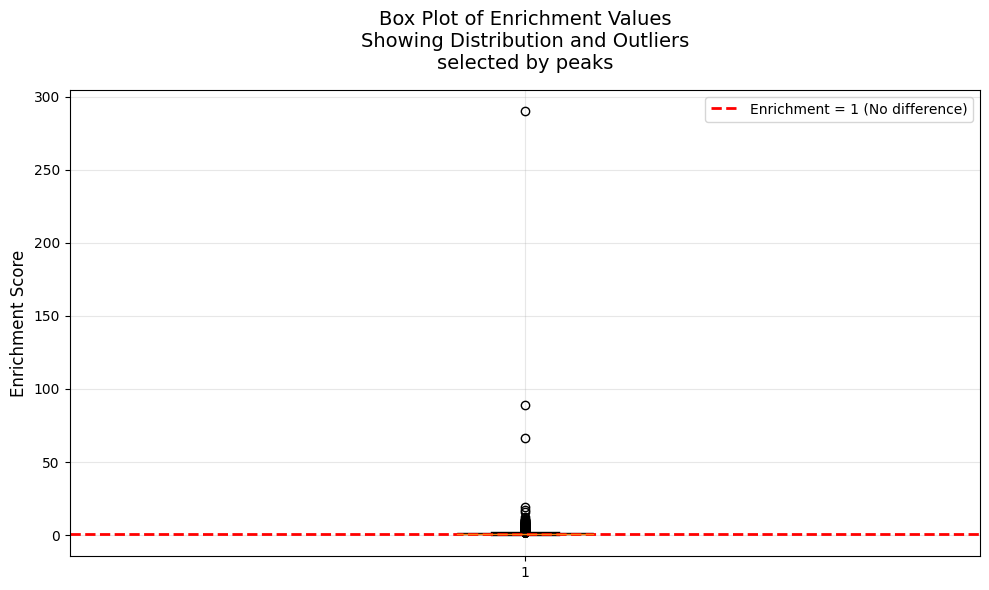

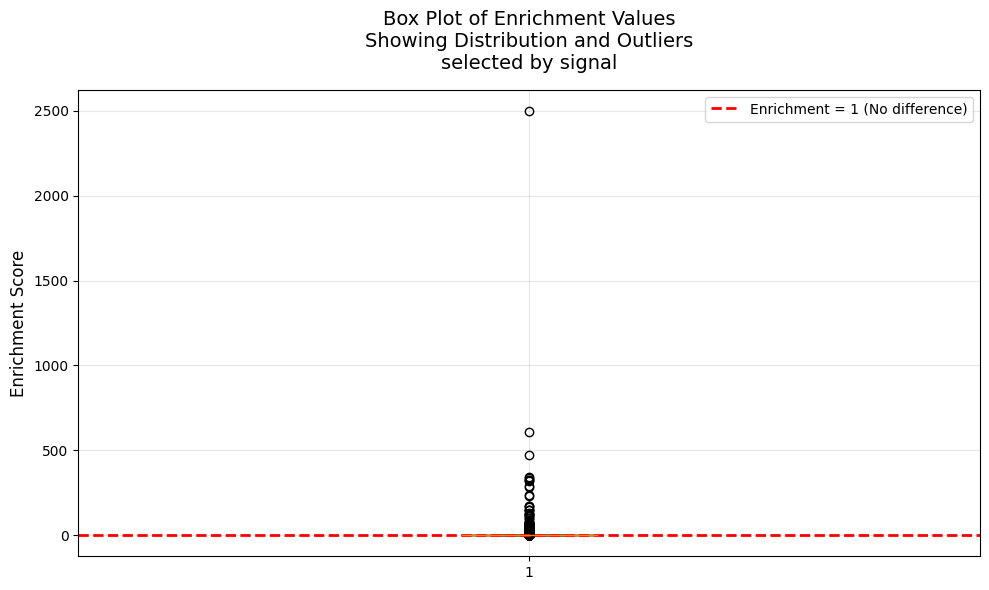

In [16]:
plot_enrichment_boxplot(both_df_by_peaks, title="selected by peaks")
plot_enrichment_boxplot(both_df_by_signal, title="selected by signal")

In [17]:
outliers_df_signal["endo_replicates_with_peaks"].value_counts()

signal_endo_zero_peaks  = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 0]
signal_endo_one_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 1]
signal_endo_two_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 2]
signal_endo_three_peaks = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 3]

outliers_df_peaks["endo_replicates_with_peaks"].value_counts()

peaks_endo_zero_peaks  = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 0]
peaks_endo_one_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 1]
peaks_endo_two_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 2]
peaks_endo_three_peaks = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 3]

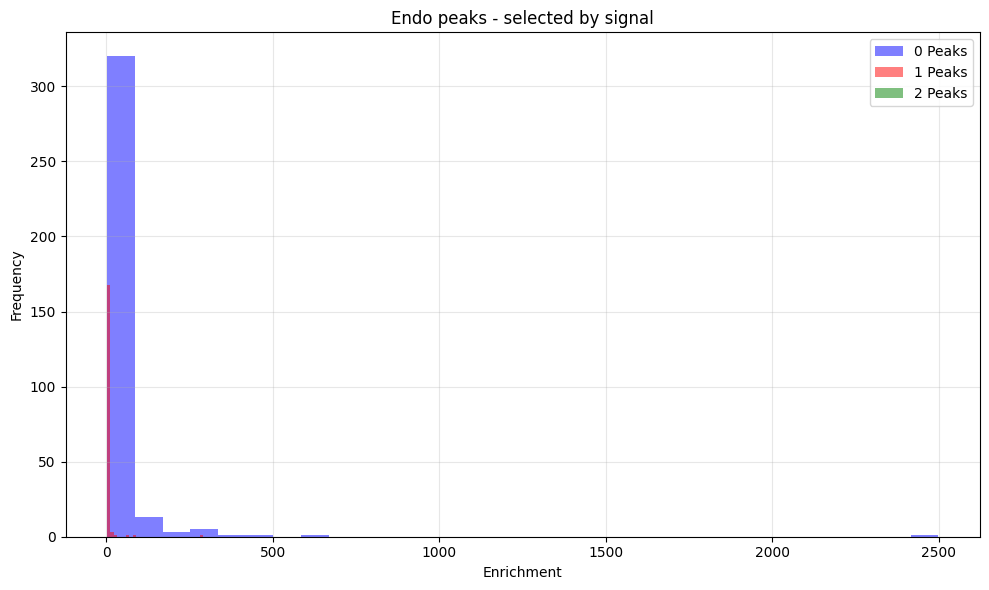

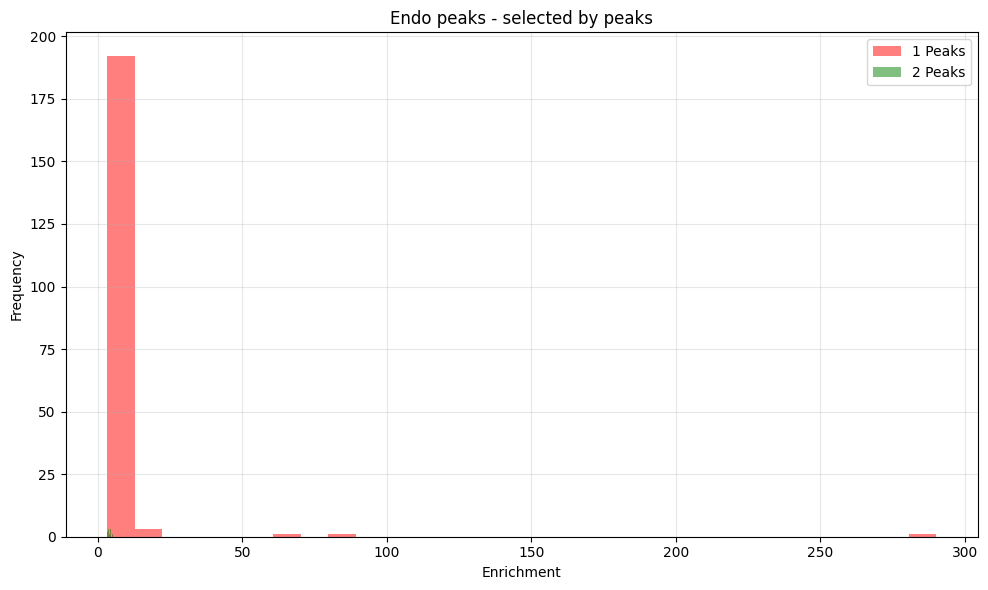

In [18]:
# Classify and plot for signal and peaks outliers
peaks_zero_peaks_signal, peaks_one_peaks_signal, peaks_two_peaks_signal, peaks_three_peaks_signal = plot_by_peaks(outliers_df_signal, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by signal")
peaks_zero_peaks_peaks, peaks_one_peaks_peaks, peaks_two_peaks_peaks, peaks_three_peaks_peaks = plot_by_peaks(outliers_df_peaks, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by peaks")

In [19]:
print_outlier_groups(peaks_two_peaks_peaks, "peaks")


First 5 outliers selected by peaks:
chr15:98,762,433-98,763,412                       enrichment: 5.112595522534346
chrX:170,676,257-170,677,937                      enrichment: 4.934107322032432
chr4:123,201,322-123,201,625                      enrichment: 4.855980847921074
chr7:79,715,429-79,715,900                        enrichment: 4.793502437895492
chr1:172,376,350-172,377,347                      enrichment: 4.662826950315053

Middle 5 outliers selected by peaks:
chr10:11,149,205-11,149,869                       enrichment: 3.982454248139226
chr11:80,209,067-80,209,554                       enrichment: 3.7702316591200886
chr4:131,836,379-131,838,503                      enrichment: 3.759402513712775
chr19:6,401,468-6,401,689                         enrichment: 3.698137280919565
chr2:11,602,879-11,603,307                        enrichment: 3.6850659191105457

Last 5 outliers selected by peaks:
chr4:133,250,810-133,251,146                      enrichment: 3.351364011538359
chr10:8

In [20]:
print_outlier_groups(peaks_two_peaks_signal, "signal")


First 5 outliers selected by signal:
chr15:98,762,433-98,763,412                       enrichment: 5.112595522534346
chrX:170,676,257-170,677,937                      enrichment: 4.934107322032432
chr4:123,201,322-123,201,625                      enrichment: 4.855980847921074
chr7:79,715,429-79,715,900                        enrichment: 4.793502437895492
chr1:172,376,350-172,377,347                      enrichment: 4.662826950315053

Middle 5 outliers selected by signal:
chr2:163,472,210-163,472,708                      enrichment: 4.170204300336368
chr2:118,976,105-118,976,804                      enrichment: 4.122803274872902
chr19:46,317,590-46,318,210                       enrichment: 4.069343339836077
chr10:11,149,205-11,149,869                       enrichment: 3.982454248139226
chr11:80,209,067-80,209,554                       enrichment: 3.7702316591200886

Last 5 outliers selected by signal:
chr5:52,476,411-52,476,656                        enrichment: 3.4858413272965607
chr4

## Regions length distribution

### Region length - defined by the outermost peaks coordinates

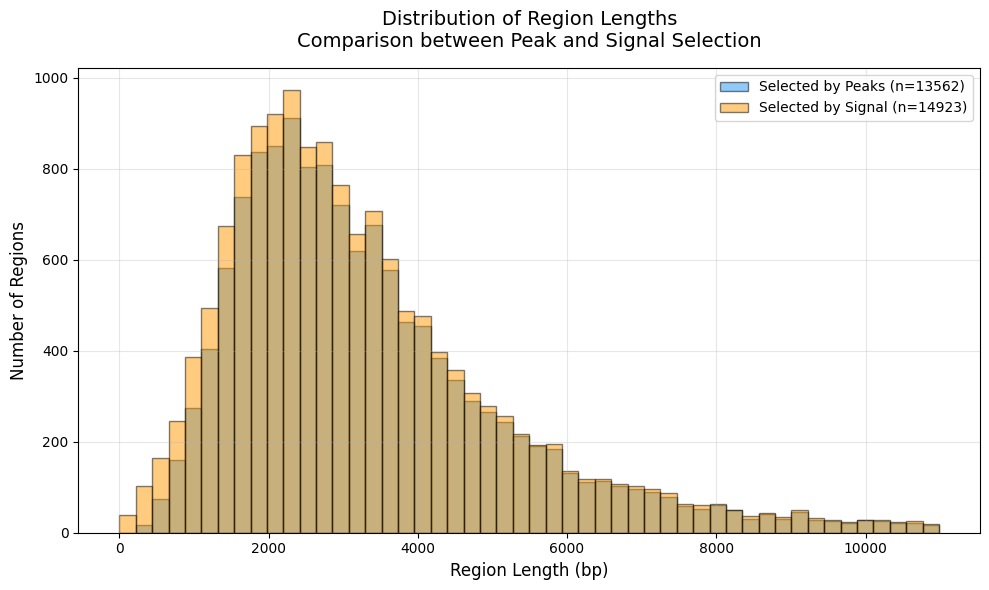

In [21]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='region_length')

In [22]:
both_df_sorted_by_region_length_signal = both_df_by_signal.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_signal.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
10048,chr4,148951660,148952711,28.850291,18.404866,1.567536,0.2,both,both,False,3,2,"25.52438127728439,31.444062274246793,29.582429402940488","16.944114989579063,19.865617735133494",34979,1051,CpG:,1721,3,1,4.57641;11.3859;6.00517,"8.38011,2.70579",148919192,148954171
10047,chr4,148938649,148938905,28.850291,18.404866,1.567536,0.2,both,exo_only,False,3,2,"25.52438127728439,31.444062274246793,29.582429402940488","16.944114989579063,19.865617735133494",34979,256,CpG:,1721,3,0,4.57641;3.65557;5.1156,NaN,148919192,148954171
7239,chr19,59469037,59469305,41.632720,35.771423,1.163854,0.2,both,both,False,3,2,"39.154506400136775,42.351129533752356,43.392525259849556","34.72028307460554,36.82256366579751",23045,268,CpG:,1038,3,1,5.93023;12.3771;6.60721,8.39349,59450888,59473933
7238,chr19,59467141,59467557,41.632720,35.771423,1.163854,0.2,both,both,False,3,2,"39.154506400136775,42.351129533752356,43.392525259849556","34.72028307460554,36.82256366579751",23045,416,CpG:,1038,3,1,5.93023;12.3771;6.60721,12.5769,59450888,59473933
7236,chr19,59451480,59451824,42.992878,38.123355,1.127731,0.2,both,both,False,3,2,"42.84484193996158,41.340740006103786,44.793053429427864","35.64894087932479,40.59776996611675",22693,344,CpG:,1038,3,1,7.05486;11.0538;6.60721,5.54396,59447847,59470540


In [23]:
both_df_sorted_by_region_length_peaks = both_df_by_peaks.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_peaks.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
10048,chr4,148951660,148952711,28.850291,18.404866,1.567536,0.2,both,both,False,3,2,"25.52438127728439,31.444062274246793,29.582429402940488","16.944114989579063,19.865617735133494",34979,1051,CpG:,1721,3,1,4.57641;11.3859;6.00517,"8.38011,2.70579",148919192,148954171
7238,chr19,59467141,59467557,41.632720,35.771423,1.163854,0.2,both,both,False,3,2,"39.154506400136775,42.351129533752356,43.392525259849556","34.72028307460554,36.82256366579751",23045,416,CpG:,1038,3,1,5.93023;12.3771;6.60721,12.5769,59450888,59473933
7239,chr19,59469037,59469305,41.632720,35.771423,1.163854,0.2,both,both,False,3,2,"39.154506400136775,42.351129533752356,43.392525259849556","34.72028307460554,36.82256366579751",23045,268,CpG:,1038,3,1,5.93023;12.3771;6.60721,8.39349,59450888,59473933
7236,chr19,59451480,59451824,42.992878,38.123355,1.127731,0.2,both,both,False,3,2,"42.84484193996158,41.340740006103786,44.793053429427864","35.64894087932479,40.59776996611675",22693,344,CpG:,1038,3,1,7.05486;11.0538;6.60721,5.54396,59447847,59470540
8393,chr2,167777455,167777726,79.994576,64.541676,1.239425,0.8,both,both,False,3,2,"58.5343156873228,71.8351678906179,109.61424505702277","59.470649875551025,69.61270134309568",21038,271,CpG:,1865,3,2,10.3069;21.2532;8.05397,12.6472;16.3285,167759249,167780287


In [24]:
print_outlier_groups(both_df_sorted_by_region_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr4:148,951,660-148,952,711                      enrichment: 1.5675360210075622
chr19:59,467,141-59,467,557                       enrichment: 1.163854173960379
chr19:59,469,037-59,469,305                       enrichment: 1.163854173960379
chr19:59,451,480-59,451,824                       enrichment: 1.127730704230584
chr2:167,777,455-167,777,726                      enrichment: 1.23942515369246

Middle 5 outliers selected by peaks:
chr8:47,412,402-47,413,926                        enrichment: 0.9119083670595703
chr13:35,991,308-35,991,546                       enrichment: 1.0181292851766734
chrX:74,023,384-74,023,956                        enrichment: 0.8708701249138339
chr16:59,639,143-59,639,555                       enrichment: 0.9202819996421778
chr5:143,548,675-143,549,179                      enrichment: 1.1648287624981106

Last 5 outliers selected by peaks:
chr9:40,871,768-40,872,035                        enrichment: 0.4870319343397009
chr

In [25]:
print_outlier_groups(both_df_sorted_by_region_length_signal, "signal")


First 5 outliers selected by signal:
chr4:148,951,660-148,952,711                      enrichment: 1.5675360210075622
chr4:148,938,649-148,938,905                      enrichment: 1.5675360210075622
chr19:59,469,037-59,469,305                       enrichment: 1.163854173960379
chr19:59,467,141-59,467,557                       enrichment: 1.163854173960379
chr19:59,451,480-59,451,824                       enrichment: 1.127730704230584

Middle 5 outliers selected by signal:
chr12:102,743,358-102,744,050                     enrichment: 0.4398967319972505
chr3:139,074,471-139,075,968                      enrichment: 0.7457988796627492
chr5:129,019,673-129,020,973                      enrichment: 1.290273288621152
chr5:124,327,601-124,328,227                      enrichment: 1.0342103060687238
chr5:34,169,152-34,169,708                        enrichment: 2.235217560354296

Last 5 outliers selected by signal:
chr18:37,505,887-37,506,400                       enrichment: 66.70898393034696
c

### CpG length - defined by the CpG coordinates

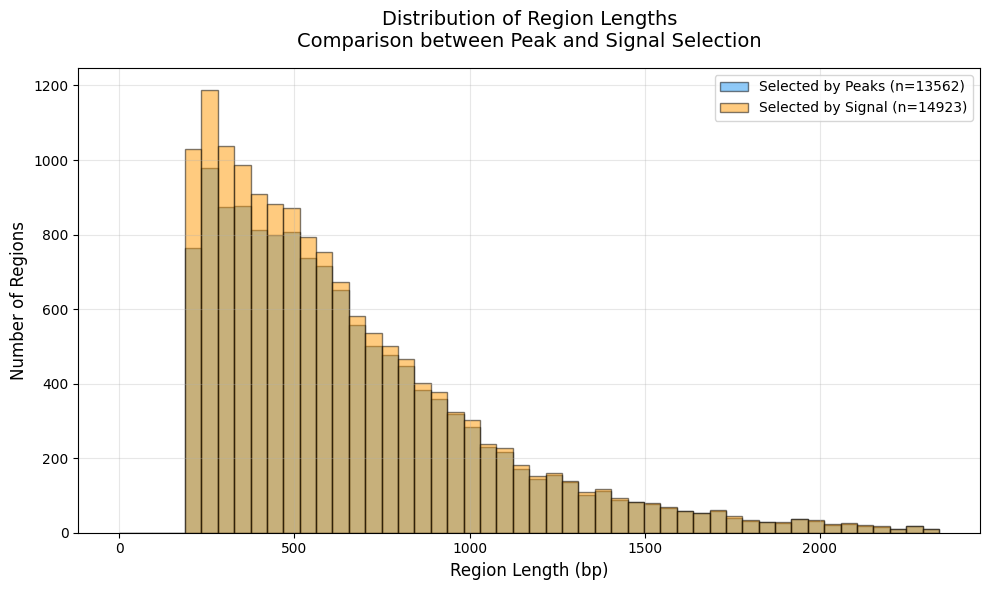

In [26]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='cpg_length')

In [27]:
both_df_sorted_by_cpg_length_peaks = both_df_by_peaks.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_peaks.head()
print_outlier_groups(both_df_sorted_by_cpg_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr8:92,355,697-92,360,826                        enrichment: 0.9218516276501008
chr5:33,430,439-33,435,552                        enrichment: 0.7096272221087795
chrX:12,086,982-12,092,060                        enrichment: 1.1787320183881742
chrX:12,076,861-12,081,915                        enrichment: 1.2710026064056446
chr17:34,118,396-34,122,981                       enrichment: 1.1249046188596163

Middle 5 outliers selected by peaks:
chr6:148,895,887-148,896,457                      enrichment: 0.6223031113770461
chr2:18,698,656-18,699,226                        enrichment: 4.084950689112785
chr14:54,894,056-54,894,626                       enrichment: 1.1145714905749664
chr16:96,191,818-96,192,388                       enrichment: 1.1744824129362166
chr6:124,414,623-124,415,193                      enrichment: 0.9834237629409088

Last 5 outliers selected by peaks:
chr17:59,013,119-59,013,320                       enrichment: 7.037843315542935


In [28]:
both_df_sorted_by_cpg_length_signal = both_df_by_signal.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_signal.head()
print_outlier_groups(both_df_sorted_by_cpg_length_signal, "signal")


First 5 outliers selected by signal:
chr8:92,355,697-92,360,826                        enrichment: 0.9218516276501008
chr5:33,430,439-33,435,552                        enrichment: 0.7096272221087795
chrX:12,086,982-12,092,060                        enrichment: 1.1787320183881742
chrX:12,076,861-12,081,915                        enrichment: 1.2710026064056446
chr17:34,118,396-34,122,981                       enrichment: 1.1249046188596163

Middle 5 outliers selected by signal:
chr11:75,630,686-75,631,233                       enrichment: 1.0058685071735871
chr1:36,691,322-36,691,869                        enrichment: 0.7528621500832077
chr5:124,111,929-124,112,476                      enrichment: 1.007941038415456
chr2:29,827,236-29,827,783                        enrichment: 0.7463492784103016
chr5:100,498,315-100,498,862                      enrichment: 0.5629297914465766

Last 5 outliers selected by signal:
chr14:34,822,879-34,823,080                       enrichment: 1.5094292062700

# Exo only

In [29]:
exo_only_df_by_peaks.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
7727,chr2,74655439,74656362,3.063463,0.0,inf,1.0,exo_only,exo_only,False,2,0,"0.0,1.4745040734608967,7.715884842569866","0.0,0.0",1008,923,CpG:,1154,1,0,2.71689,NaN,74655205,74656213
12865,chr7,127611029,127612140,34.372588,0.0,inf,1.0,exo_only,exo_only,False,3,0,"17.59617966164347,45.272487695577446,40.249095533438435","0.0,0.0",1555,1111,CpG:,1558,3,0,5.34262;12.5264;3.80722,NaN,127610655,127612210
15068,chrX,137570910,137571192,41.897654,0.0,inf,1.0,exo_only,exo_only,False,3,0,"10.627945384644626,9.43682131516306,105.62819658245957","0.0,0.0",285,282,CpG:,1634,1,0,8.2265,NaN,137570727,137571012
10466,chr5,65379604,65379952,19.280905,0.0,inf,1.0,exo_only,exo_only,False,3,0,"23.162961189641006,22.104460136834966,12.575292544435497","0.0,0.0",1892,348,CpG:,1083,2,0,3.90874;2.98497,NaN,65378193,65380085
11219,chr6,18030271,18030637,9.957832,0.0,inf,1.0,exo_only,exo_only,False,2,0,"7.770318294732312,22.103176447336146,0.0","0.0,0.0",534,366,CpG:,722,1,0,2.88726,NaN,18029943,18030477


In [30]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = exo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by peaks, size:", len(exo_only_df_by_peaks))
stats_df

Exo only - by peaks, size: 1261


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,1261.000000,1261.000000,1039.000000,1261.000000,1261.000000,1261.000000
mean,24.966950,11.501129,13.132616,2396.064235,448.306106,0.660878
std,20.105491,17.894083,86.635567,2476.477690,310.478767,0.312961
min,1.845443,0.000000,0.230513,171.000000,201.000000,0.200000
25%,14.770565,1.057442,1.292038,845.000000,246.000000,0.400000
50%,20.510908,6.956723,2.128638,1629.000000,339.000000,0.800000
75%,29.178256,15.128138,4.549742,3030.000000,519.000000,1.000000
max,281.200319,271.357651,2498.617974,34979.000000,2655.000000,1.000000


In [31]:
stats_df = exo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by signal, size:", len(exo_only_df_by_signal))
stats_df

Exo only - by signal, size: 224


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,224.000000,224.0,0.0,224.000000,224.000000,224.0
mean,22.986474,0.0,NaN,678.901786,438.964286,1.0
std,13.100211,0.0,NaN,485.540353,304.874404,0.0
min,3.063463,0.0,NaN,171.000000,201.000000,1.0
25%,13.372172,0.0,NaN,268.000000,244.750000,1.0
50%,19.161686,0.0,NaN,566.500000,326.500000,1.0
75%,30.339473,0.0,NaN,975.500000,519.750000,1.0
max,76.525821,0.0,NaN,2995.000000,2021.000000,1.0


In [32]:
print_across_distribution(exo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr2:74,655,439-74,656,362                        enrichment: inf
chr7:127,611,029-127,612,140                      enrichment: inf
chrX:137,570,910-137,571,192                      enrichment: inf
chr5:65,379,604-65,379,952                        enrichment: inf
chr6:18,030,271-18,030,637                        enrichment: inf

Middle 5 elements selected by peaks:
chr10:78,780,348-78,780,675                       enrichment: 2.810002895206383
chr11:72,314,388-72,314,632                       enrichment: 2.802141115907742
chr1:136,234,222-136,234,663                      enrichment: 2.7891286771548645
chr4:33,209,289-33,209,766                        enrichment: 2.780106248742448
chr5:143,357,576-143,357,873                      enrichment: 2.777717526502005

Last 5 elements selected by peaks:
chr11:96,332,715-96,333,268                       enrichment: 0.3473190470567479
chr15:85,537,341-85,537,789                       enrichment: 0.3409171690491

In [33]:
print_across_distribution(exo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr2:74,655,439-74,656,362                        enrichment: inf
chr7:127,611,029-127,612,140                      enrichment: inf
chrX:137,570,910-137,571,192                      enrichment: inf
chr5:65,379,604-65,379,952                        enrichment: inf
chr6:18,030,271-18,030,637                        enrichment: inf

Middle 5 elements selected by signal:
chr10:122,448,598-122,449,321                     enrichment: inf
chr7:19,286,809-19,287,011                        enrichment: inf
chr7:63,891,487-63,891,751                        enrichment: inf
chr17:47,410,250-47,410,753                       enrichment: inf
chr19:41,375,950-41,376,186                       enrichment: inf

Last 5 elements selected by signal:
chr17:32,100,027-32,100,473                       enrichment: inf
chr10:13,060,921-13,061,266                       enrichment: inf
chr3:54,899,481-54,899,688                        enrichment: inf
chr19:5,503,575-5,503,862   

/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda

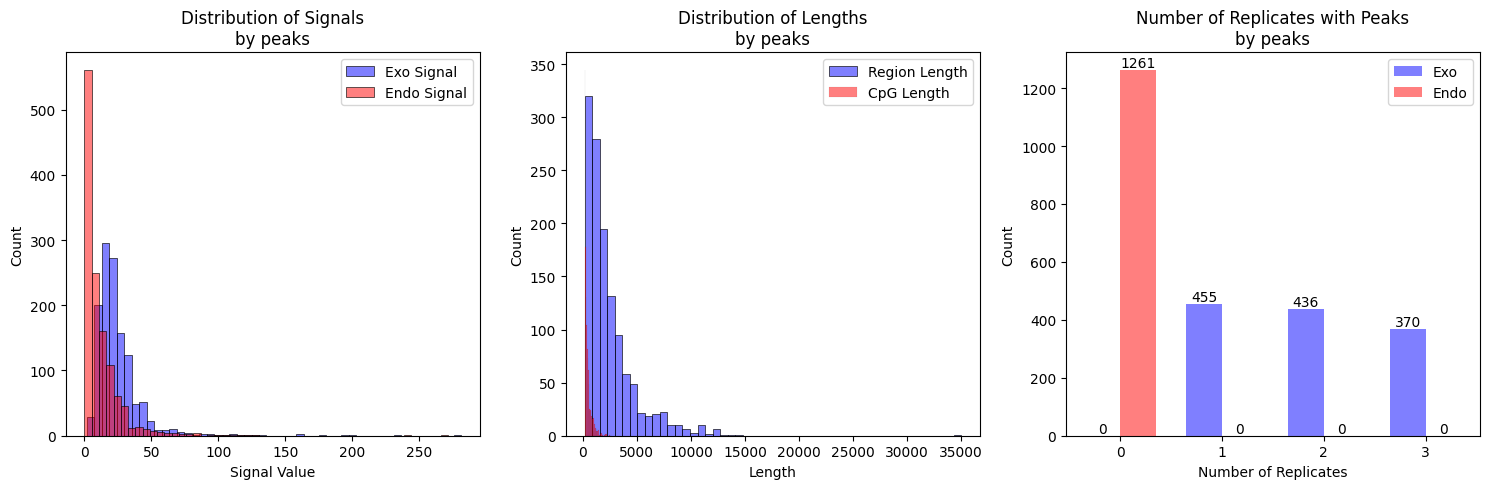

/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda

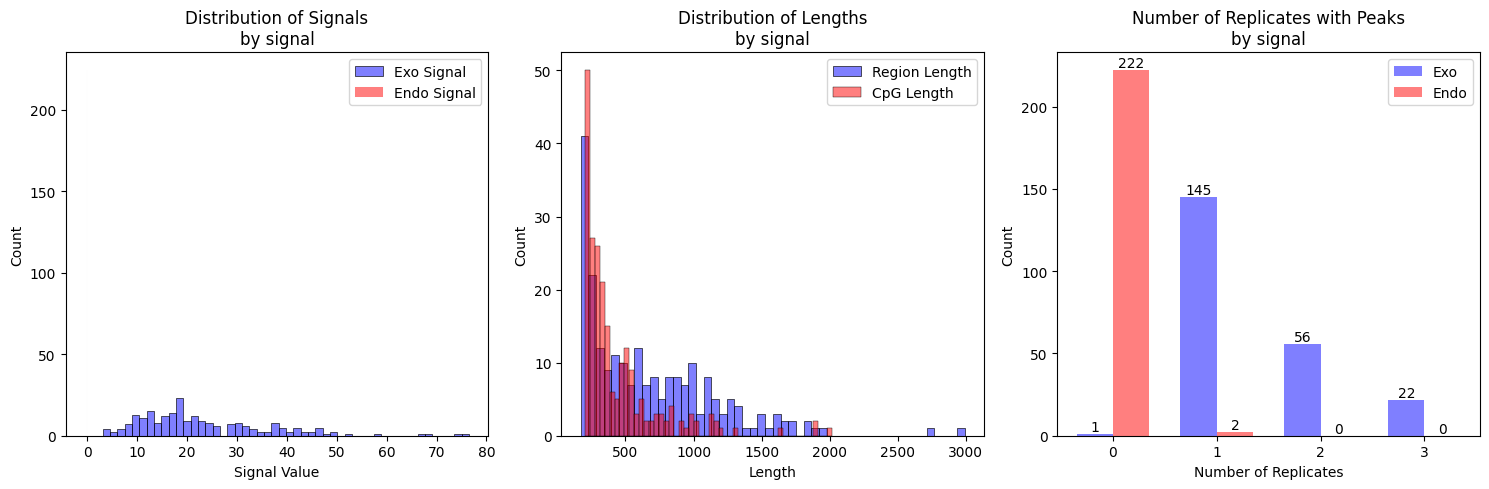

In [34]:
plot_exo_only_distributions(exo_only_df_by_peaks, title="by peaks")
plot_exo_only_distributions(exo_only_df_by_signal, title="by signal")

# Endo only

In [35]:
endo_only_df_by_peaks.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
8556,chr3,26602036,26602356,21.150156,0.000000,inf,1.0,exo_only,endo_only,False,3,0,"4.782847419483065,4.279482345737609,54.3881387358325","0.0,0.0",731,320,CpG:,787,0,1,NaN,3.63832,26601654,26602385
10023,chr4,146932301,146932990,6.521571,0.239158,27.268856,0.5,both,endo_only,False,3,1,"8.73388522045574,4.80297747825368,6.027850975064913","0.4783164526535053,0.0",809,689,CpG:,1706,0,1,NaN,11.9756,146931788,146932597
8432,chr2,172979754,172980130,6.269879,1.660824,3.775162,1.0,both,endo_only,False,1,1,"0.0,0.0,18.80963782129678","3.3216476263166803,0.0",269,376,CpG:,1904,0,1,NaN,2.25264,172979513,172979782
2114,chr11,72961075,72961596,22.120303,6.560105,3.371943,1.0,both,endo_only,False,3,1,"9.65566662493865,7.240367664359294,49.46487477177731","0.0,13.120210752112108",1551,521,CpG:,1141,0,1,NaN,3.48273,72960400,72961951
1256,chr10,80656107,80656330,119.874787,42.079060,2.848799,0.2,both,endo_only,False,3,2,"116.9109691920179,123.06219934991066,119.65119267078155","27.664973345411585,56.49314646294776",1175,223,CpG:,1200,0,2,NaN,7.72401;9.99211,80655826,80657001


In [36]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = endo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by peaks, size:", len(endo_only_df_by_peaks))
stats_df

endo only - by peaks, size: 332


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,332.000000,332.000000,331.000000,332.000000,332.000000,332.000000
mean,12.633606,29.698905,0.509637,1403.668675,531.518072,0.595984
std,26.844023,24.919519,1.543906,1223.787526,464.478842,0.282161
min,0.000000,0.000000,0.000000,200.000000,201.000000,0.200000
25%,3.443732,16.265626,0.145731,524.750000,259.750000,0.400000
50%,6.702770,24.509718,0.317730,1048.500000,335.500000,0.500000
75%,12.217514,36.422010,0.553267,1812.250000,618.000000,0.800000
max,365.999599,274.254265,27.268856,7143.000000,3882.000000,1.000000


In [37]:
stats_df = endo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by signal, size:", len(endo_only_df_by_signal))
stats_df

endo only - by signal, size: 8


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,8.0,8.000000,8.0,8.000000,8.000000,8.0
mean,0.0,45.029085,0.0,338.250000,454.625000,1.0
std,0.0,20.471755,0.0,148.661408,348.563557,0.0
min,0.0,14.258852,0.0,200.000000,211.000000,1.0
25%,0.0,29.478314,0.0,237.500000,219.000000,1.0
50%,0.0,48.110917,0.0,288.500000,238.000000,1.0
75%,0.0,55.576298,0.0,388.250000,641.000000,1.0
max,0.0,78.515713,0.0,624.000000,1112.000000,1.0


In [38]:
print_across_distribution(endo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr3:26,602,036-26,602,356                        enrichment: inf
chr4:146,932,301-146,932,990                      enrichment: 27.26885595681444
chr2:172,979,754-172,980,130                      enrichment: 3.775162196068436
chr11:72,961,075-72,961,596                       enrichment: 3.371943246688696
chr10:80,656,107-80,656,330                       enrichment: 2.8487990783034656

Middle 5 elements selected by peaks:
chr10:127,081,526-127,081,730                     enrichment: 0.3213860316329514
chr6:67,534,863-67,535,660                        enrichment: 0.3206278575889288
chr3:87,783,726-87,783,939                        enrichment: 0.3177298492535527
chrX:105,764,341-105,765,297                      enrichment: 0.3160037496239393
chr12:89,260,160-89,260,526                       enrichment: 0.3158143686952006

Last 5 elements selected by peaks:
chr2:14,627,145-14,627,366                        enrichment: 0.0
chr5:101,659,013-101,659,837   

In [39]:
print_across_distribution(endo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr12:24,493,515-24,493,726                       enrichment: 0.0
chr4:3,230,990-3,231,230                          enrichment: 0.0
chr7:49,636,312-49,636,892                        enrichment: 0.0
chr2:14,627,145-14,627,366                        enrichment: 0.0
chr5:101,659,013-101,659,837                      enrichment: 0.0

Last 5 elements selected by signal:
chr2:14,627,145-14,627,366                        enrichment: 0.0
chr5:101,659,013-101,659,837                      enrichment: 0.0
chr2:74,681,964-74,683,076                        enrichment: 0.0
chr15:103,035,731-103,035,967                     enrichment: 0.0
chr19:28,763,321-28,763,534                       enrichment: 0.0


/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda

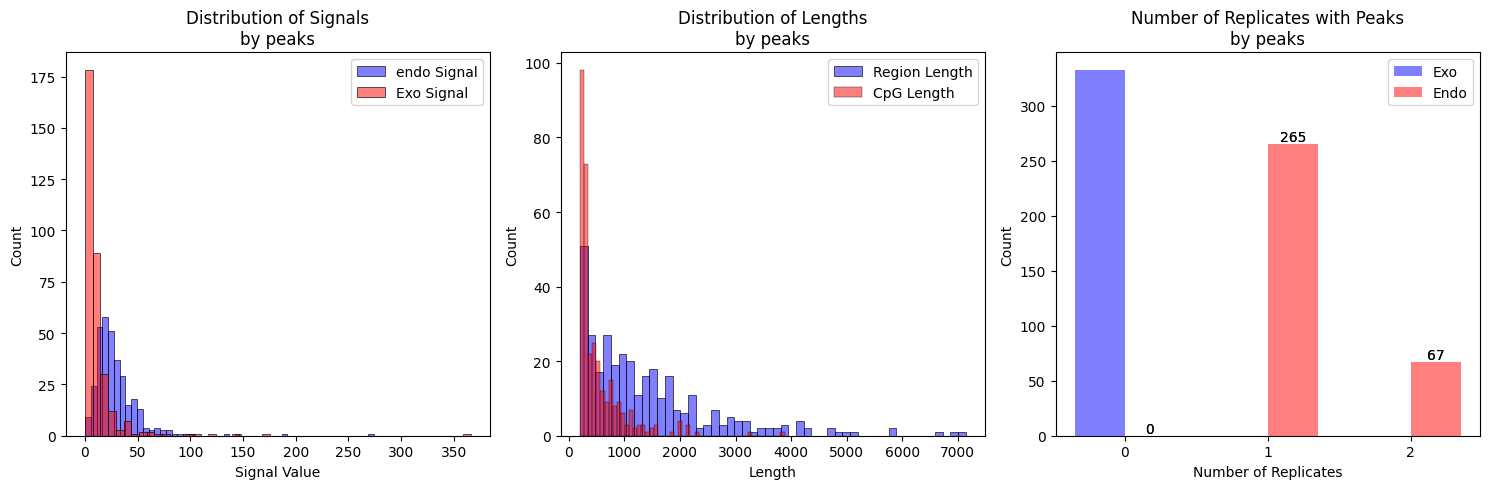

/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/beegfs/scratch/ric.broccoli/kubacki.michal/conda

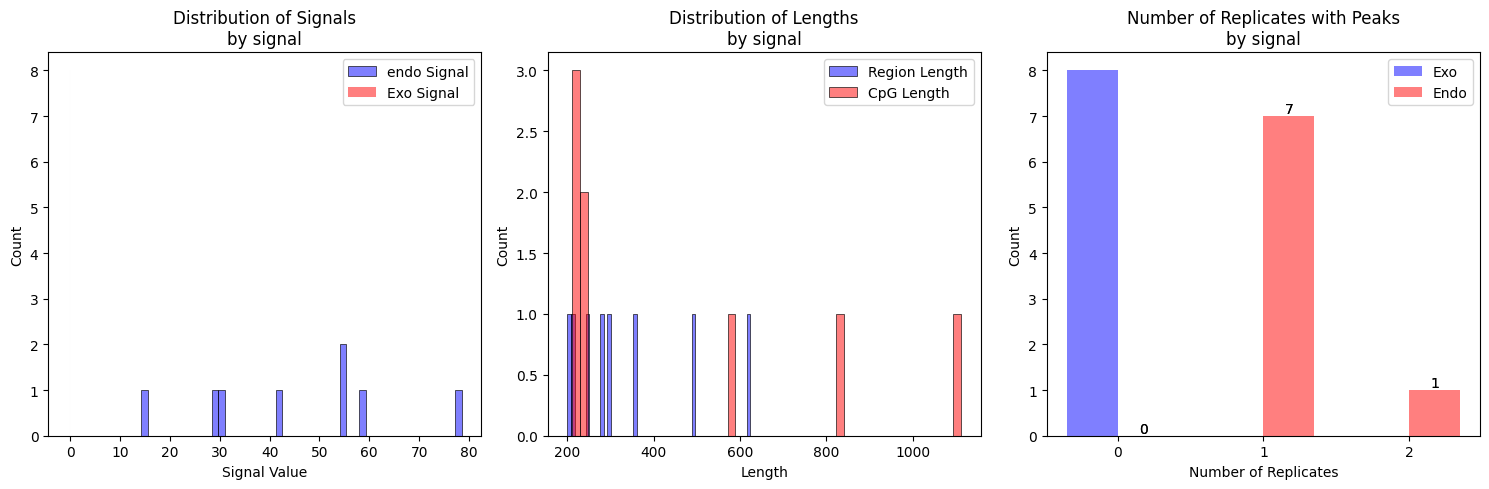

In [40]:
plot_endo_only_distributions(endo_only_df_by_peaks, title="by peaks")
plot_endo_only_distributions(endo_only_df_by_signal, title="by signal")

# Create output files

## UP in Exo

In [41]:
up_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_signal_1_5 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1.5) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()    
up_enriched_signal_2 = both_df_by_signal[(both_df_by_signal['enrichment'] > 2) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
up_enriched_peaks_1_5 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()    
up_enriched_peaks_2 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 2) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()

In [42]:
print("up_enriched_signal_1.shape:",   up_enriched_signal_1.shape)
print("up_enriched_signal_1_5.shape:", up_enriched_signal_1_5.shape)
print("up_enriched_signal_2.shape:",   up_enriched_signal_2.shape)
print("up_enriched_peaks_1.shape:",    up_enriched_peaks_1.shape)
print("up_enriched_peaks_1_5.shape:",  up_enriched_peaks_1_5.shape)
print("up_enriched_peaks_2.shape:",    up_enriched_peaks_2.shape)

up_enriched_signal_1.shape: (8415, 24)
up_enriched_signal_1_5.shape: (3031, 24)
up_enriched_signal_2.shape: (1065, 24)
up_enriched_peaks_1.shape: (7792, 24)
up_enriched_peaks_1_5.shape: (2645, 24)
up_enriched_peaks_2.shape: (820, 24)


## UP in Endo

In [43]:
down_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] < 1.0 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_08 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.8 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_05 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.5 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 1.0) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_08 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.8) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_05 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()


In [44]:
print("down_enriched_signal_1.shape:",  down_enriched_signal_1.shape)
print("down_enriched_signal_08.shape:", down_enriched_signal_08.shape)
print("down_enriched_signal_05.shape:", down_enriched_signal_05.shape)
print("down_enriched_peaks_1.shape:",   down_enriched_peaks_1.shape)
print("down_enriched_peaks_08.shape:",  down_enriched_peaks_08.shape)
print("down_enriched_peaks_05.shape:",  down_enriched_peaks_05.shape)

down_enriched_signal_1.shape: (5956, 24)
down_enriched_signal_08.shape: (3295, 24)
down_enriched_signal_05.shape: (727, 24)
down_enriched_peaks_1.shape: (5533, 24)
down_enriched_peaks_08.shape: (2951, 24)
down_enriched_peaks_05.shape: (494, 24)


## Save output files

In [45]:
up_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1.csv', index=False)
up_enriched_signal_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1_5.csv', index=False)
up_enriched_signal_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_2.csv', index=False)
up_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1.csv', index=False)
up_enriched_peaks_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1_5.csv', index=False)
up_enriched_peaks_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_2.csv', index=False)

down_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_1.csv', index=False)
down_enriched_signal_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_08.csv', index=False)
down_enriched_signal_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_05.csv', index=False)
down_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_1.csv', index=False)
down_enriched_peaks_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_08.csv', index=False)
down_enriched_peaks_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_05.csv', index=False)

exo_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/exo_only_df_by_signal.csv', index=False)
endo_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/endo_only_df_by_signal.csv', index=False)
exo_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/exo_only_df_by_peaks.csv', index=False)
endo_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/endo_only_df_by_peaks.csv', index=False)

# Exo min expression filtering

In [46]:
up_enriched_signal_1_exo_over_20 = up_enriched_signal_1[up_enriched_signal_1['exo_signal'] >= 20]
up_enriched_signal_1_5_exo_over_20 = up_enriched_signal_1_5[up_enriched_signal_1_5['exo_signal'] >= 20]
up_enriched_signal_2_exo_over_20 = up_enriched_signal_2[up_enriched_signal_2['exo_signal'] >= 20]
up_enriched_peaks_1_exo_over_20 = up_enriched_peaks_1[up_enriched_peaks_1['exo_signal'] >= 20]
up_enriched_peaks_1_5_exo_over_20 = up_enriched_peaks_1_5[up_enriched_peaks_1_5['exo_signal'] >= 20]
up_enriched_peaks_2_exo_over_20 = up_enriched_peaks_2[up_enriched_peaks_2['exo_signal'] >= 20]

down_enriched_signal_1_exo_over_20 = down_enriched_signal_1[down_enriched_signal_1['exo_signal'] >= 20]
down_enriched_signal_08_exo_over_20 = down_enriched_signal_08[down_enriched_signal_08['exo_signal'] >= 20]
down_enriched_signal_05_exo_over_20 = down_enriched_signal_05[down_enriched_signal_05['exo_signal'] >= 20]
down_enriched_peaks_1_exo_over_20 = down_enriched_peaks_1[down_enriched_peaks_1['exo_signal'] >= 20]
down_enriched_peaks_08_exo_over_20 = down_enriched_peaks_08[down_enriched_peaks_08['exo_signal'] >= 20]
down_enriched_peaks_05_exo_over_20 = down_enriched_peaks_05[down_enriched_peaks_05['exo_signal'] >= 20]

exo_only_df_by_signal_exo_over_20 = exo_only_df_by_signal[exo_only_df_by_signal['exo_signal'] >= 20]
endo_only_df_by_signal_exo_over_20 = endo_only_df_by_signal[endo_only_df_by_signal['exo_signal'] >= 20]
exo_only_df_by_peaks_exo_over_20 = exo_only_df_by_peaks[exo_only_df_by_peaks['exo_signal'] >= 20]
endo_only_df_by_peaks_exo_over_20 = endo_only_df_by_peaks[endo_only_df_by_peaks['exo_signal'] >= 20]


up_enriched_signal_1_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1_exo_over_20.csv', index=False)
up_enriched_signal_1_5_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1_5_exo_over_20.csv', index=False)
up_enriched_signal_2_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_2_exo_over_20.csv', index=False)
up_enriched_peaks_1_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1_exo_over_20.csv', index=False)
up_enriched_peaks_1_5_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1_5_exo_over_20.csv', index=False)
up_enriched_peaks_2_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_2_exo_over_20.csv', index=False)

down_enriched_signal_1_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_1_exo_over_20.csv', index=False)
down_enriched_signal_08_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_08_exo_over_20.csv', index=False)
down_enriched_signal_05_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_05_exo_over_20.csv', index=False)
down_enriched_peaks_1_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_1_exo_over_20.csv', index=False)
down_enriched_peaks_08_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_08_exo_over_20.csv', index=False)
down_enriched_peaks_05_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_05_exo_over_20.csv', index=False)

exo_only_df_by_signal_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/exo_only_df_by_signal_exo_over_20.csv', index=False)
endo_only_df_by_signal_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/endo_only_df_by_signal_exo_over_20.csv', index=False)
exo_only_df_by_peaks_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/exo_only_df_by_peaks_exo_over_20.csv', index=False)
endo_only_df_by_peaks_exo_over_20.to_csv(f'{OUTPUT_LISTS_PATH}/endo_only_df_by_peaks_exo_over_20.csv', index=False)